In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt 
import random
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D ,MaxPooling2D, Dense,Flatten

In [2]:
import os

In [24]:
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator

# Define the augmentation parameters
augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a directory to save the augmented images
output_dir = r'C:\Users\Shreya\Desktop\jupyter_notebook\cat_imbalance - Copy'
os.makedirs(output_dir, exist_ok=True)

# Generate augmented images
count = 0
index = 4001  # Start index for naming the images
for img_name in os.listdir(r'C:\Users\Shreya\Desktop\jupyter_notebook\cat_imbalance - Copy'):
    img_path = os.path.join(r'C:\Users\Shreya\Desktop\jupyter_notebook\cat_imbalance - Copy', img_name)
    img = Image.open(img_path)
    img_array = np.array(img)  # Convert the image to an array

    augmented_images = []
    for _ in range(15):
        augmented = augmentation.random_transform(img_array)  # Apply transformation to the array
        augmented_images.append(augmented)

    for i, augmented in enumerate(augmented_images):
        count += 1
        augmented_img = Image.fromarray(augmented)  # Convert the array back to an image
        augmented_img.save(os.path.join(output_dir, f'cat.{index}.jpg'))
        index += 1

        if count >= 6000:
            break

    if count >= 6000:
        break

print(f'Successfully generated {count} augmented cat images.')


Successfully generated 6000 augmented cat images.


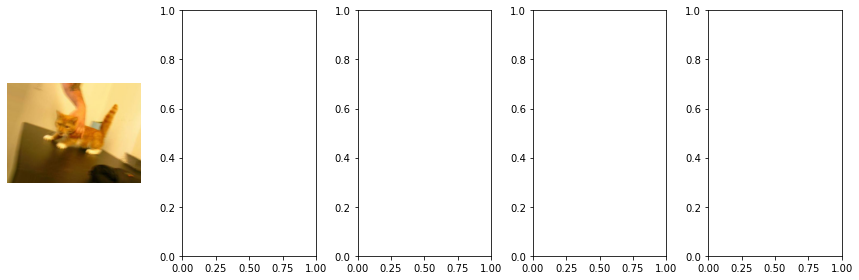

In [37]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the directory where augmented images are saved
augmented_images_dir = r'C:\Users\Shreya\Desktop\jupyter_notebook\cat_imbalance - Copy'

# Select the starting index of the augmented images
starting_index = 4008

# Select the number of images to visualize
num_images_to_visualize = 5

# Get a list of all augmented image paths
image_paths = os.listdir(augmented_images_dir)

# Filter the image paths to include only those starting from the desired index
filtered_image_paths = [image_path for image_path in image_paths if image_path.startswith(f'cat.{starting_index}')]

# Randomly select a subset of filtered image paths
selected_image_paths = filtered_image_paths[:num_images_to_visualize]

# Create a figure with subplots to display the augmented images
fig, axes = plt.subplots(1, num_images_to_visualize, figsize=(12, 4))

# Iterate over the selected augmented images and display them
for i, image_path in enumerate(selected_image_paths):
    img = Image.open(os.path.join(augmented_images_dir, image_path))
    axes[i].imshow(img)
    axes[i].axis('off')

# Adjust the layout and display the figure
plt.tight_layout()
plt.show()
